<a href="https://colab.research.google.com/github/rahmanziaur/TestGraphTheory/blob/main/Adjanceny.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***2) Importing Necessary Libraries***

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

***3) First function creates Adjacency Matrix from given Graph vertices and Edges***

In [ ]:
def createAdjacencyMatrix(vertices,edges):
  noofvertices=len(vertices)
  adjM=[]
  while(len(adjM)<noofvertices):
    temp=[]
    for i in range(noofvertices):
      temp.append(0)
    adjM.append(temp)
  for edge in edges:
    i=edge[0]
    j=edge[1]
    if i>=noofvertices or j>=noofvertices or i<0 or j<0:
      print(f"Not a Proper Input in Edge {i},{j}")
    else:
      adjM[i][j]=1
      adjM[j][i]=1
  G=nx.Graph()
  G.add_edges_from(edges)
  nx.draw_networkx(G)
  plt.show()
  return adjM
  

***4) Creating a Graph from Vertices and Edges to Check the function***

In [ ]:
vertices=[0,1,2,3,4,5]
edges=[[1,2],[2,4],[1,5],[3,5],[4,5],[1,3],[0,3],[0,2],[5,3],[5,1]]

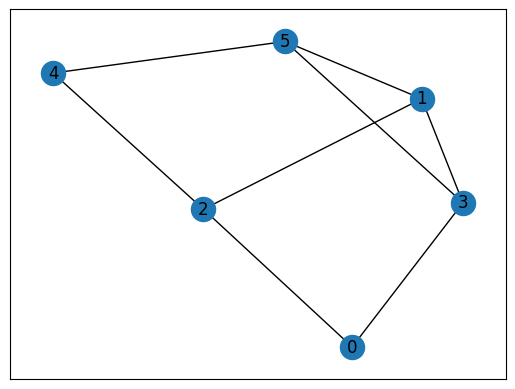

[[0, 0, 1, 1, 0, 0],
 [0, 0, 1, 1, 0, 1],
 [1, 1, 0, 0, 1, 0],
 [1, 1, 0, 0, 0, 1],
 [0, 0, 1, 0, 0, 1],
 [0, 1, 0, 1, 1, 0]]

In [ ]:
createAdjacencyMatrix(vertices,edges)

***5) The Second Function creates Graph from Adjacency Matrix***

In [ ]:
def createGraph(adjM):
  edges=[]
  noofvertices=len(adjM)
  for mat in adjM:
    if len(mat)>noofvertices or len(mat)<noofvertices:
      print("False Adjacency Matrix")
      return 0
  for i in range(len(adjM)):
    mat=adjM[i]
    for j in range(len(mat)):
      if mat[j]==1:
        temp=[i,j]
        edges.append(temp)
  G=nx.Graph()
  G.add_edges_from(edges)
  nx.draw_networkx(G)
  plt.show()
  vertices=[i for i in range(len(adjM))]
  return vertices,edges

***6) Creating an Adjacency Matrix to check the function***

In [ ]:
adjM=[[1,0,1,0,1],[0,0,1,1,0],[1,1,0,1,0],[1,1,0,0,0],[0,0,0,1,0]]


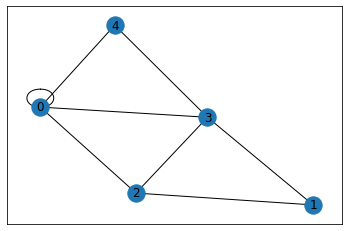

([0, 1, 2, 3, 4],
 [[0, 0],
  [0, 2],
  [0, 4],
  [1, 2],
  [1, 3],
  [2, 0],
  [2, 1],
  [2, 3],
  [3, 0],
  [3, 1],
  [4, 3]])

In [ ]:
createGraph(adjM)

In [ ]:
import csv
import heapq

def STM(graph, start, end):
    distances = {start: 0}
    queue = [(0, start)]
    while queue:
        (dist, node) = heapq.heappop(queue)
        if node == end:
            return distances[end]
        if dist > distances[node]:
            continue
        for neighbor, weight in graph[node].items():
            new_dist = dist + weight
            if neighbor not in distances or new_dist < distances[neighbor]:
                distances[neighbor] = new_dist
                heapq.heappush(queue, (new_dist, neighbor))
    
    # Find how many sources are directly connected
    total_dependency = 0 #of start
    for source in graph.keys():
        if source != start and distances.get(source) != None and distances[source] > 0:
            total_dependency = total_dependency +1 
    return total_dependency

graph = {}
with open('OutputTestDataAnalysis.csv', 'r') as csvfile:
    reader = csv.reader(csvfile)
    for row in reader:
        Source, Target, Weight = row
        Weight = int(Weight)
        if Source not in graph:
            graph[Source] = {}
        if Target not in graph:
            graph[Target] = {}
        graph[Source][Target] = Weight
        graph[Target][Source] = Weight

# Find the source with the maximum dependencies
max_dependencies = 0
max_source = None
dependency_list = []
for source in graph.keys():
    dependencies = STM(graph, source, "")  # Pass an empty string as the target to find dependencies for all targets
    dependency_list.append([source,dependencies])
    if dependencies > max_dependencies:
        max_dependencies = dependencies
        max_source = source

# Sort the dependency_list
dependency_list = sorted(dependency_list, key=lambda x: x[1], reverse=True) # Set reverse=False if we need to change the order

# Write dependency_list into a CSV file
with open("Output.csv", "w") as f:
    writer = csv.writer(f)
    writer.writerows(dependency_list)

# Print the result
if max_source is None:
    print("No sources found in the graph.")
else:
    print(f"The source with the maximum dependencies is {max_source} with {max_dependencies} dependencies.")


The source with the maximum dependencies is 2 with 33 dependencies.
